In [1]:
# IPython magig  tools
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path

from aind_vr_foraging_analysis.utils import parse, processing, plotting_utils as plotting, AddExtraColumns
from aind_vr_foraging_analysis.utils import breathing_signal as breathing

# Plotting libraries
import matplotlib.pyplot as plt


import seaborn as sns
import pandas as pd
import numpy as np
import datetime

sns.set_context('talk')

import warnings
pd.options.mode.chained_assignment = None  # Ignore SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

color1='#d95f02'
color2='#1b9e77'
color3='#7570b3'
color4='yellow'
odor_list_color = [color1, color2, color3, color4]

pdf_path = r'Z:\scratch\vr-foraging\sessions'
base_path = 'Z:/scratch/vr-foraging/data/'
foraging_figures = r'C:\Users\tiffany.ona\OneDrive - Allen Institute\Documents'

from scipy.optimize import curve_fit


In [34]:
# Day with the old and working cable

date = datetime.date.today()
date_string = "10/26/2024"
date = datetime.datetime.strptime(date_string, "%m/%d/%Y").date()
mouse = '754582'

# # Day with the new cable
# date = datetime.date.today()
# date_string = "10/27/2024"
# date = datetime.datetime.strptime(date_string, "%m/%d/%Y").date()
# mouse = '754575'

In [35]:
session_found = False
session_n = 0
directory = os.path.join(base_path, mouse)
files = os.listdir(os.path.join(base_path, mouse))

sorted_files = sorted(files, key=lambda x: os.path.getctime(os.path.join(directory, x)), reverse=True)

# All this segment is to find the correct session without having the specific path
for file_name in sorted_files:
    
    if session_found == True:
        break
    
    print(file_name)
    # Find specific session sorted by date
    session = file_name[-15:-7]
    if datetime.datetime.strptime(session, "%Y%m%d").date() != date:
        continue
    else:
        print('correct date found')
        session_found = True
        
    # Recover data streams
    session_path = os.path.join(base_path, mouse, file_name)
    session_path = Path(session_path)
    data = parse.load_session_data(session_path)
    # Load the encoder data separately
    stream_data = parse.ContinuousData(data)

754582_20241029T110218
754582_20241028T105229
754582_20241027T114248
754582_20241026T111626
correct date found


In [36]:
signal = stream_data.breathing.data.values
zero_index = stream_data.breathing.index[0]

# Define filter parameters
cutoff_freq = 1  # cutoff frequency in Hz
fs = 250  # sampling frequency in Hz

# Apply high-pass filter
filtered_breathing = breathing.highpass_filter(signal, cutoff_freq, fs)

cutoff_freq = 40  # cutoff frequency in Hz
filtered_breathing = breathing.lowpass_filter(filtered_breathing, cutoff_freq, fs)

## Signals with bandpass filter (1-40Hz)

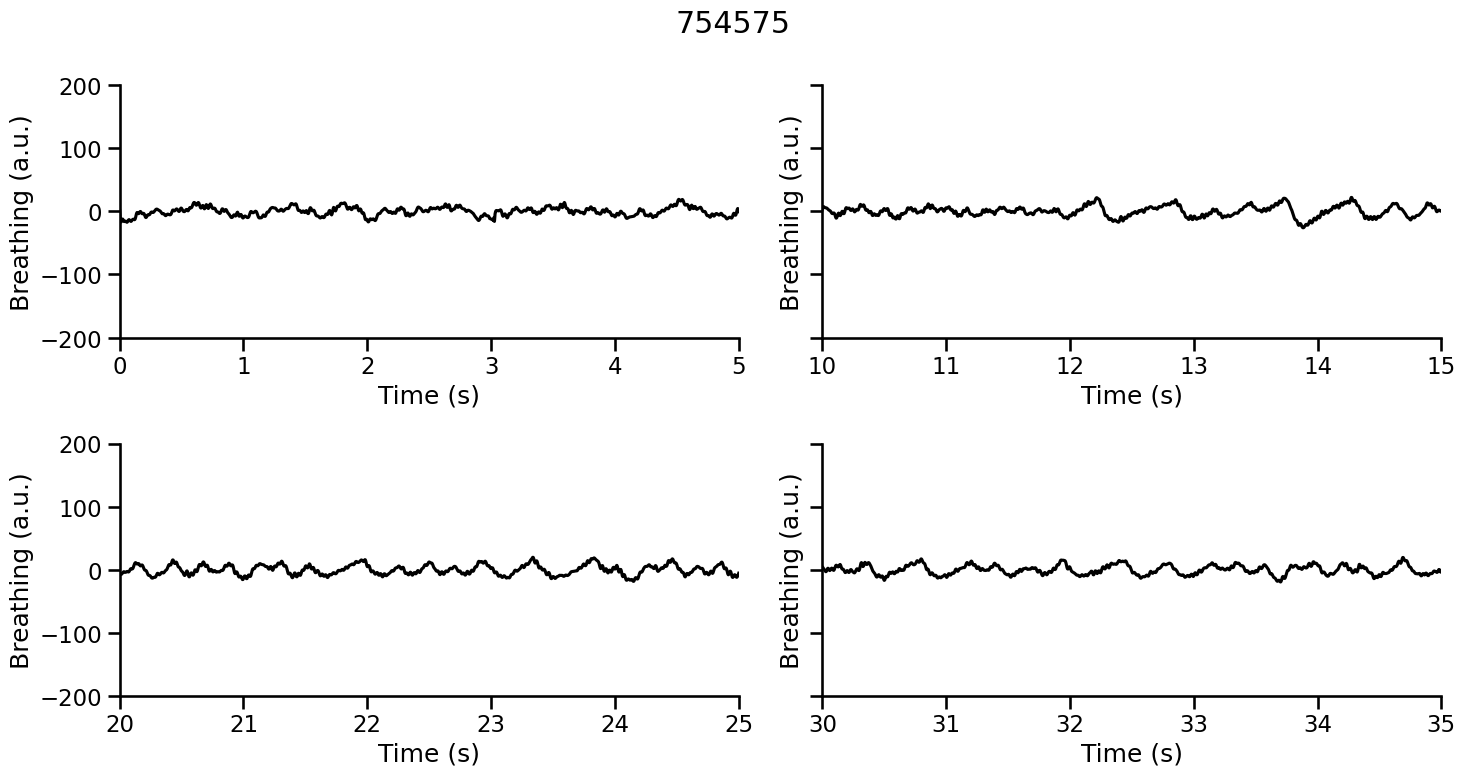

In [33]:
fig, axs = plt.subplots(2,2, figsize=(15,8), sharey=True)
plt.suptitle(f'{mouse}')

i=0
for ax in axs.flatten():
    ax.plot(stream_data.breathing.index-zero_index, filtered_breathing, color= 'black')

    ax.set_ylim(-200, 200)
    ax.set_xlim(0+i, 5+i)
    ax.set_ylabel('Breathing (a.u.)')
    ax.set_xlabel('Time (s)')
    i+=10

sns.despine()
plt.tight_layout()
fig.savefig(os.path.join(foraging_figures, f'{mouse}_thermistor_screening.png'), bbox_inches='tight')

## Using a running average and subtracting the signals

In [ ]:
window_size=30
slow_ther = breathing.moving_average(filtered_breathing, window_size=window_size)
new_ther = filtered_breathing-slow_ther

fig, axs = plt.subplots(2,2, figsize=(15,8), sharey=True)
plt.suptitle(f'{mouse}')

i=0
for ax in axs.flatten():
    ax.plot(stream_data.breathing.index-zero_index, new_ther, color= 'black')
    # ax.plot(stream_data.breathing.index-zero_index, slow_ther, color= 'blue')
    ax.set_ylim(-500, 500)
    ax.set_xlim(0+i, 5+i)
    ax.set_ylabel('Breathing (a.u.)')
    ax.set_xlabel('Time (s)')
    i+=10

sns.despine()
plt.tight_layout()
fig.savefig(os.path.join(foraging_figures, f'{mouse}_thermistor_screening_with_moving_average.png'), bbox_inches='tight')
